<h1>Lending Club Case Study</h1>
</br>
<h4>AUTHORS</h4>SUNIL S, ABHISHEK RAVINDRAKUMAR MAURYA

<h4>BUSINESS PROBLEM</h4>
<p>When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:
If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.<p>

<h4>OBJECTIVE</h4>
<p>Use EDA to understand how consumer attributes and loan attributes influence the tendency of default.</p>

In [1]:
#import all the necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#If you remove this you'll see only 10 rows truncated with '...'
pd.options.display.max_rows = 4000

In [2]:
#Reading the CSV file
#Make sure the CSV file is in the same file as the python kernel 
#Alternatively replace the CSV path in below code

loans = pd.read_csv("loan.csv",encoding='ISO-8859-1',low_memory=False)

#Converting the interest rate from type string to float
loans['int_rate'] = loans['int_rate'].str.split('%').str[0].astype(float)

In [3]:
#We see that there are lot of null values.
loans.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,12.021177,324.561922,6.896893e+04,13.315130,0.146512,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,3.724825,208.874874,6.379377e+04,6.678594,0.491812,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,5.420000,15.690000,4.000000e+03,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,9.250000,167.020000,4.040400e+04,8.170000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,11.860000,280.220000,5.900000e+04,13.400000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,14.590000,430.780000,8.230000e+04,18.600000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,24.590000,1305.190000,6.000000e+06,29.990000,11.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [4]:
#Getting concise summary of the dataframe
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(75), int64(13), object(23)
memory usage: 33.6+ MB


<h3>CHECKPOINT 1</h3>
<h3>DATA CLEANING</h3>

In [5]:
#Getting the percentage of null values in each column
#Drop columns with lot of null values as it won't be helpful in our analysis

null_values = round(100*(loans.isnull().sum()/len(loans.id)), 2)
null_values.loc[null_values > 0]

emp_title                           6.19
emp_length                          2.71
desc                               32.58
title                               0.03
mths_since_last_delinq             64.66
mths_since_last_record             92.99
revol_util                          0.13
last_pymnt_d                        0.18
next_pymnt_d                       97.13
last_credit_pull_d                  0.01
collections_12_mths_ex_med          0.14
mths_since_last_major_derog       100.00
annual_inc_joint                  100.00
dti_joint                         100.00
verification_status_joint         100.00
tot_coll_amt                      100.00
tot_cur_bal                       100.00
open_acc_6m                       100.00
open_il_6m                        100.00
open_il_12m                       100.00
open_il_24m                       100.00
mths_since_rcnt_il                100.00
total_bal_il                      100.00
il_util                           100.00
open_rv_12m     

<p>From the above executed statement we can see that we have <b>68 columns with more than 0% null values</b></p>
<p>We will not remove all the columns.</p>

In [6]:
#Removing unnecessary column for analysis
null_values_cols = list(null_values[null_values >= 30].index)
loans = loans.drop(null_values_cols,axis=1)
print(loans.shape)

(39717, 53)


<p>In the above, we are removing all the columns having null values more than 30%</p>
<p>But executing the above statement, we have dropped <b>58 columns</b> which will not be useful for our analysis since the null values are very high. We see from the shape of our dataset has now reduced to <b>53 columns</b>.</p>

In [7]:
missing_remaining = round(100*(loans.isnull().sum()/len(loans.id)), 2)
missing_remaining[missing_remaining != 0]
#We have narrowed the columns in which data is missing to 10 columns

emp_title                     6.19
emp_length                    2.71
title                         0.03
revol_util                    0.13
last_pymnt_d                  0.18
last_credit_pull_d            0.01
collections_12_mths_ex_med    0.14
chargeoff_within_12_mths      0.14
pub_rec_bankruptcies          1.75
tax_liens                     0.10
dtype: float64

<p>Employee title and employee length are crucial for our analysis. However, these columns include <b>6.19% and 2.71% null values respectively</b> which might distort our analysis. So let's drop the rows where either employee title is null or employee length is null.</p>

In [8]:
loans = loans[~loans.emp_title.isnull()]
loans = loans[~loans.emp_length.isnull()]
loans.shape

(37202, 53)

<p>Now as the case description, there are three types of variables in the dataset</p>
<p>1. Application variables</p>
<p>2. Loan variables</p>
<p>3. Loan Behaviour variables</p>
<p>We have to remove all the Loan Behaviour variables since these variables mostly related to after the loan has been approved</p>
<p>Following columns have to be removed as per the list given to us:</p>
<p><b>delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type</b></p>

In [9]:
loans = loans.drop(['delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc,pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','application_type'], axis=1, errors='ignore')
loans.shape

(37202, 34)

<p>We see that <b>19 columns</b> were dropped since they were Loan Behaviour variables.</p>
<p><b>IMPORTANT:</b>Please note the all the columns from the above list were not dropped. Some of the columns were dropped earlier when we did null check and dropped columns which were not suitable for analysis.</p>
<p>Since the columns were not present, we need to specify the attribute <b>errors=ignore</b></p>

In [10]:
missing_remaining1 = round(100*(loans.isnull().sum()/len(loans.id)), 2)
missing_remaining1[missing_remaining1 != 0]

title                         0.02
collections_12_mths_ex_med    0.13
chargeoff_within_12_mths      0.13
pub_rec_bankruptcies          1.76
tax_liens                     0.09
dtype: float64

<p>For the above columns let us analyze the type of variable</p>

In [11]:
#Printing the number of the unique values along with count for each of the above column
print("Collections_12_mths_ex_med:",loans.collections_12_mths_ex_med.unique())
print(loans.collections_12_mths_ex_med.value_counts().to_string(),"\n")

print("Chargeoff_within_12_mths:",loans.chargeoff_within_12_mths.unique())
print(loans.chargeoff_within_12_mths.value_counts().to_string(),"\n")

print("Pub_rec_bankruptcies:",loans.pub_rec_bankruptcies.unique())
print(loans.pub_rec_bankruptcies.value_counts().to_string(),"\n")

print("Tax_liens:",loans.tax_liens.unique())
print(loans.tax_liens.value_counts().to_string(),"\n")

Collections_12_mths_ex_med: [ 0. nan]
0.0    37155 

Chargeoff_within_12_mths: [ 0. nan]
0.0    37155 

Pub_rec_bankruptcies: [ 0.  1.  2. nan]
0.0    35039
1.0     1502
2.0        7 

Tax_liens: [ 0. nan]
0.0    37170 



<p>These are all categorical variables.</p>
<p>Now since the values in column <b>Collections_12_mths_ex_med, Chargeoff_within_12_mths, Tax_liens</b> is 0 or NaN. Hence we are going to drop all the columns since this column will not have impact on our analysis.</p>
<p>For variable <b>Pub_rec_bankruptcies</b> we are going to replace the null values by the central tendency. In this case, mode is the clear representation of the variable. Hence we are going to replace the null values by 0.</p>

In [12]:
loans = loans.drop(['collections_12_mths_ex_med','chargeoff_within_12_mths','tax_liens'], axis=1)
loans.pub_rec_bankruptcies.fillna(loans.pub_rec_bankruptcies.mode()[0], inplace=True)
print("Pub_rec_bankruptcies:",loans.pub_rec_bankruptcies.unique())
print(loans.pub_rec_bankruptcies.value_counts().to_string(),"\n")
loans.shape

Pub_rec_bankruptcies: [0. 1. 2.]
0.0    35693
1.0     1502
2.0        7 



(37202, 31)

In [13]:
loans['term']=loans['term'].astype(str).str.strip('').str[0:3]
loans['term'].head()
loans['term']=loans['term'].astype(int)
loans['issued']=loans['issue_d'].str.split('-').str[1]
loans['issued'].astype(int)

1        11
3        11
4        11
5        11
6        11
         ..
39710     7
39711     7
39712     7
39713     7
39716     7
Name: issued, Length: 37202, dtype: int32

<p>Finally, before we start our analysis we need to filter the rows such that it includes only values without <b>current</b> status</p>

In [14]:
loans = loans.loc[loans['loan_status'] != "Current"]
loans.shape

(36136, 32)

<h3>END OF DATA CLEANING</h3>
<p>We are done with the data cleaning part and now head on to the analysis part.</p>
<h3>ANALYSIS - START</h3>

In [15]:
#Finding the correlation between the different columns of the dataset
#Using the corr function in pandas
loans.corr()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,dti,open_acc,pub_rec,policy_code,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies
id,1.000000,0.993500,0.123246,0.134316,0.236651,0.179689,0.057957,0.078341,0.007793,0.090075,0.018296,-0.020243,NaN,NaN,NaN,-0.000923
member_id,0.993500,1.000000,0.123398,0.133711,0.246925,0.198558,0.054959,0.073397,0.008984,0.091414,0.015829,-0.020067,NaN,NaN,NaN,-0.000105
loan_amnt,0.123246,0.123398,1.000000,0.981602,0.936210,0.348215,0.298697,0.931293,0.255517,0.063912,0.174405,-0.046677,NaN,NaN,NaN,-0.029968
funded_amnt,0.134316,0.133711,0.981602,1.000000,0.954652,0.326833,0.303065,0.957230,0.251024,0.063947,0.172857,-0.047395,NaN,NaN,NaN,-0.031234
funded_amnt_inv,0.236651,0.246925,0.936210,0.954652,1.000000,0.346952,0.295665,0.902552,0.238454,0.072976,0.159972,-0.049260,NaN,NaN,NaN,-0.032388
term,0.179689,0.198558,0.348215,0.326833,0.346952,1.000000,0.441600,0.089815,0.044973,0.077074,0.044185,0.012515,NaN,NaN,NaN,0.020799
int_rate,0.057957,0.054959,0.298697,0.303065,0.295665,0.441600,1.000000,0.274524,0.045486,0.114364,0.007798,0.099717,NaN,NaN,NaN,0.084701
installment,0.078341,0.073397,0.931293,0.957230,0.902552,0.089815,0.274524,1.000000,0.252474,0.054221,0.170913,-0.042851,NaN,NaN,NaN,-0.028655
annual_inc,0.007793,0.008984,0.255517,0.251024,0.238454,0.044973,0.045486,0.252474,1.000000,-0.120770,0.153472,-0.013777,NaN,NaN,NaN,-0.010699
dti,0.090075,0.091414,0.063912,0.063947,0.072976,0.077074,0.114364,0.054221,-0.120770,1.000000,0.289386,-0.005413,NaN,NaN,NaN,0.007914


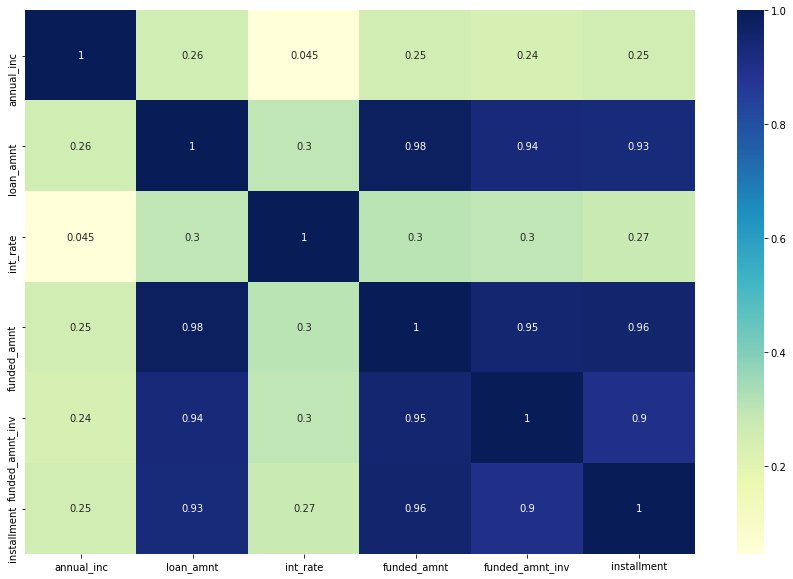

In [16]:
plt.figure(figsize=(15,10))
ax = sns.heatmap(loans[['annual_inc','loan_amnt','int_rate','funded_amnt','funded_amnt_inv','installment']].corr(), cmap="YlGnBu", annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [17]:
loans['int_rate'].describe()

count    36136.000000
mean        11.968718
std          3.684652
min          5.420000
25%          9.010000
50%         11.830000
75%         14.420000
max         24.400000
Name: int_rate, dtype: float64

(36136, 32)

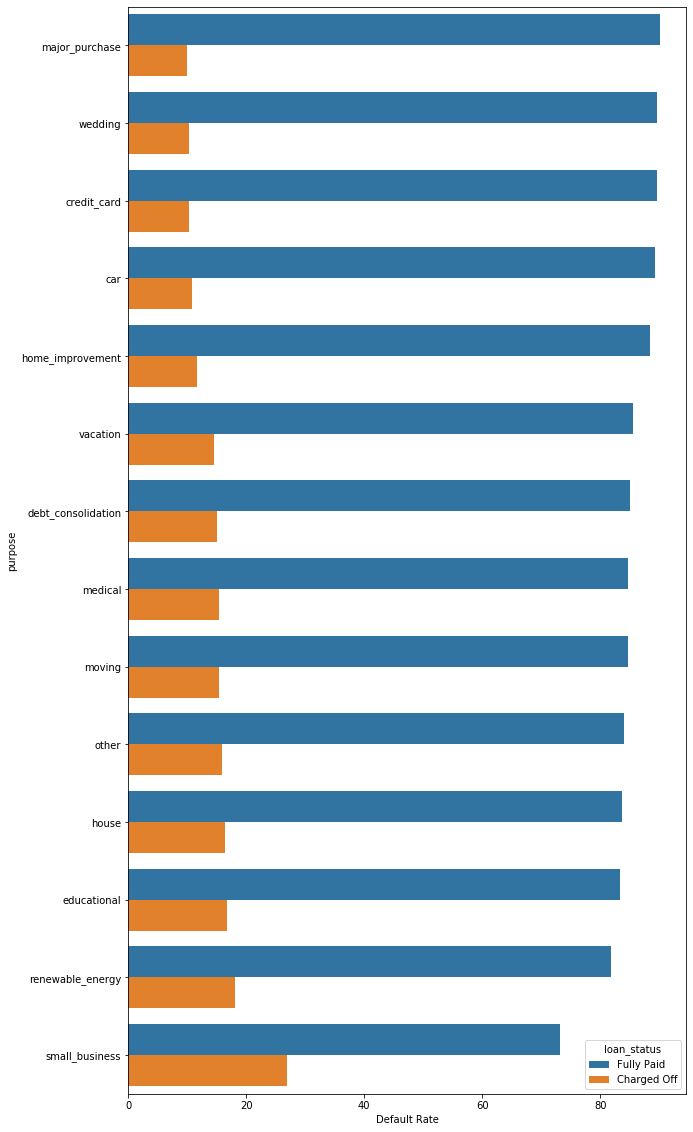

In [18]:
#We are plotting the purpose against the default rate
freq_rnkcnt_rate=(loans[loans['loan_status']!="Current"].groupby(['purpose','loan_status']).loan_status.count()/loans[loans['loan_status']!="Current"].groupby(['purpose']).loan_status.count())*100
freq_rnkcnt_rate=pd.DataFrame(freq_rnkcnt_rate)
freq_rnkcnt_rate.dropna(inplace=True,axis=0)

freq_rnkcnt_rate.rename(columns={"loan_status":"Default Rate"},inplace=True)
freq_rnkcnt_rate=pd.DataFrame(freq_rnkcnt_rate.to_records())
freq_rnkcnt_rate.sort_values(by="Default Rate",inplace=True,ascending=False)
plt.figure(figsize=(10,20))
sns.barplot(x="Default Rate",y="purpose",data=freq_rnkcnt_rate,hue="loan_status")
loans.shape

In [19]:
#In the below graph let us plot purpose against default rate
freq_rnkcnt=loans[loans['loan_status']!="Current"].groupby(['purpose','loan_status']).loan_status.count()
freq_rnkcnt=pd.DataFrame(freq_rnkcnt)
freq_rnkcnt.dropna(inplace=True,axis=0)

freq_rnkcnt.rename(columns={"loan_status":"Default Rate"},inplace=True)
freq_rnkcnt=pd.DataFrame(freq_rnkcnt.to_records())
freq_rnkcnt.sort_values(by="Default Rate",inplace=True,ascending=False)

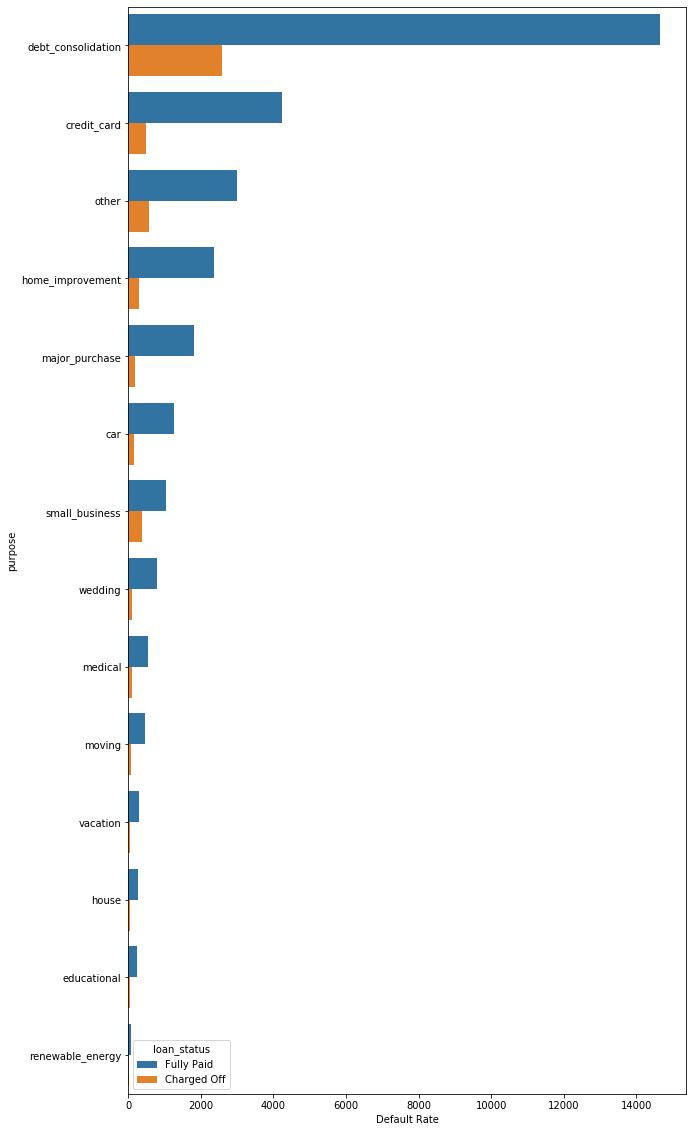

In [20]:
plt.figure(figsize=(10,20))
sns.barplot(x="Default Rate",y="purpose",data=freq_rnkcnt,hue="loan_status")

In [21]:
#Let's understand the correlation between the loan status and term here 
freq_rnkcnt_term=loans[loans['loan_status']=="Charged Off"].groupby(['term','loan_status']).loan_status.count()

freq_rnkcnt_term=pd.DataFrame(freq_rnkcnt_term)
freq_rnkcnt_term.rename(columns={"loan_status":"count"},inplace=True)
freq_rnkcnt_term

,,count
term,loan_status,
36,Charged Off,2899
60,Charged Off,2232


<p>We can see that when the loan terms are higher, the default count has reduced.</p>

In [22]:
freq_rnkcnt_lc=(loans[(loans['loan_status']!="Current")].groupby(['grade','loan_status']).grade.count()/loans[(loans['loan_status']!="Current")].groupby(['grade']).grade.count())*100
freq_rnkcnt_lc=pd.DataFrame(freq_rnkcnt_lc)
freq_rnkcnt_lc.dropna(inplace=True,axis=0)
freq_rnkcnt_lc.rename(columns={"grade":"Percentage"},inplace=True)
freq_rnkcnt_lc=pd.DataFrame(freq_rnkcnt_lc.to_records())
freq_rnkcnt_lc.sort_values(by="grade",inplace=True,ascending=False)
freq_rnkcnt_lc

,grade,loan_status,Percentage
12,G,Charged Off,33.680556
13,G,Fully Paid,66.319444
10,F,Charged Off,31.887202
11,F,Fully Paid,68.112798
8,E,Charged Off,26.450849
9,E,Fully Paid,73.549151
6,D,Charged Off,21.382469
7,D,Fully Paid,78.617531
4,C,Charged Off,16.592232
5,C,Fully Paid,83.407768


<p>From the table above, we see that when grade was A, the percentage of loans that were <b>Fully paid is 94.34%.</b>Thus the lending company should lend more A grade loans.</p>

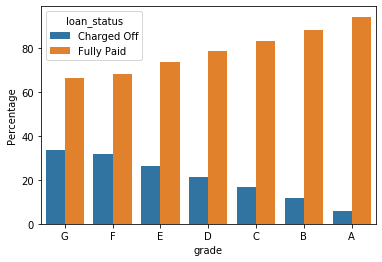

In [23]:
sns.barplot(x="grade",y="Percentage",data=freq_rnkcnt_lc,hue="loan_status")

,home_ownership,loan_status,Percentage
0,MORTGAGE,Charged Off,13.277774
4,OWN,Charged Off,14.141414
6,RENT,Charged Off,15.023421
2,OTHER,Charged Off,18.750000
3,OTHER,Fully Paid,81.250000
7,RENT,Fully Paid,84.976579
5,OWN,Fully Paid,85.858586
1,MORTGAGE,Fully Paid,86.722226


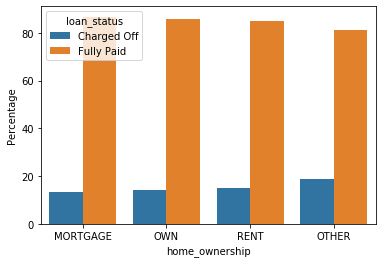

In [24]:
#Plotting the correlation between the home ownership and loan status
loans1 = loans.loc[loans['home_ownership']!="NONE"]
freq_rnkcnt_ownership=loans1[(loans1['loan_status']!="Current")].groupby(['home_ownership','loan_status']).loan_status.count()*100/loans1[(loans1['loan_status']!="Current")].groupby(['home_ownership']).loan_status.count()
freq_rnkcnt_ownership=pd.DataFrame(freq_rnkcnt_ownership)
freq_rnkcnt_ownership.rename(columns={"loan_status":"Percentage"},inplace=True)
freq_rnkcnt_ownership=pd.DataFrame(freq_rnkcnt_ownership.to_records())
freq_rnkcnt_ownership.sort_values(by="Percentage",inplace=True)
sns.barplot(x="home_ownership",y="Percentage",data=freq_rnkcnt_ownership,hue="loan_status")
# No clear correlation between home ownership and the Loan Status as there is no significant difference
freq_rnkcnt_ownership

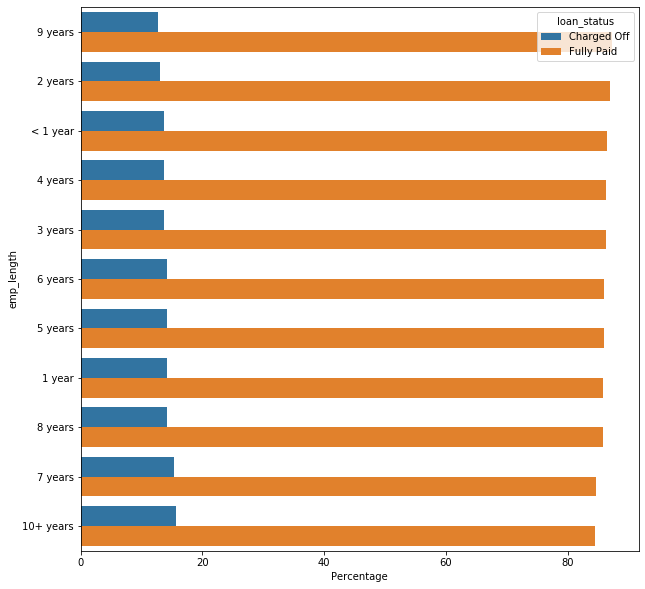

In [25]:
#Studying the effect of number of years of experience a person has on loan status
freq_rnkcnt_emp=(loans[(loans['loan_status']!="Current")].groupby(['emp_length','loan_status']).grade.count()/loans[(loans['loan_status']!="Current")].groupby(['emp_length']).grade.count())*100
freq_rnkcnt_emp=pd.DataFrame(freq_rnkcnt_emp)
freq_rnkcnt_emp.dropna(inplace=True,axis=0)
freq_rnkcnt_emp.rename(columns={"grade":"Percentage"},inplace=True)
freq_rnkcnt_emp=pd.DataFrame(freq_rnkcnt_emp.to_records())
freq_rnkcnt_emp.sort_values(by="Percentage",inplace=True)
freq_rnkcnt_emp
plt.figure(figsize=(10,10))
sns.barplot(x="Percentage",y="emp_length",data=freq_rnkcnt_emp,hue="loan_status")

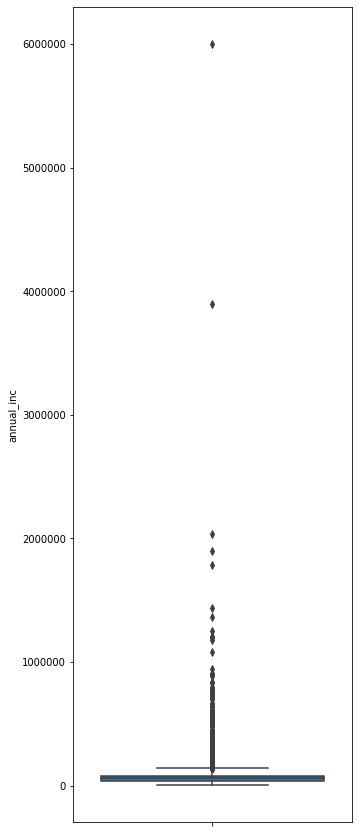

In [26]:
plt.figure(figsize=(5,15))
sns.boxplot(y="annual_inc",data=loans)

<p>We can observe from the box plot above that there are outliers for the variable. Hence mean isn't the right measure for the central tendency. Instead we will be using median which is more appropriate in this scenario.</p>

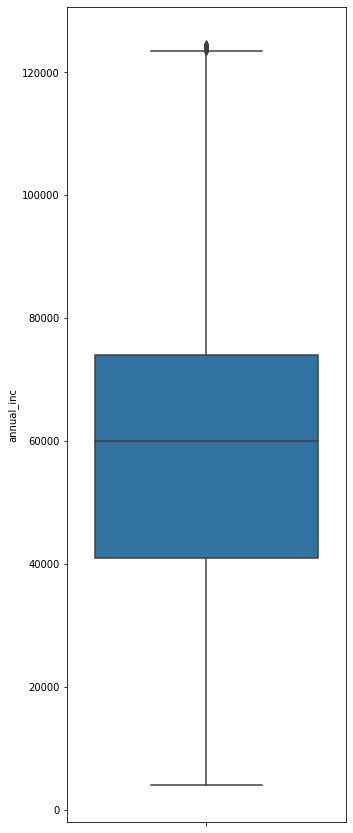

In [27]:
median = loans['annual_inc'].median()
std = loans['annual_inc'].std()
outliers = (loans['annual_inc'] - median).abs() > std
loans[outliers] = np.nan
loans['annual_inc'].fillna(median, inplace=True)
plt.figure(figsize=(5,15))
sns.boxplot(y="annual_inc",data=loans)

In [28]:
loans['annual_inc'].describe()

count     36136.000000
mean      59304.877964
std       24033.794033
min        4000.000000
25%       41000.000000
50%       60000.000000
75%       74000.000000
max      124596.000000
Name: annual_inc, dtype: float64

In [29]:
loans=loans[pd.notnull(loans['annual_inc'])]
loans['annual_inc_classification']=pd.cut(loans['annual_inc'],[0,40000,80000,90000],labels=['Low','Mid Range','High'])
loans=loans[pd.notnull(loans['annual_inc_classification'])]

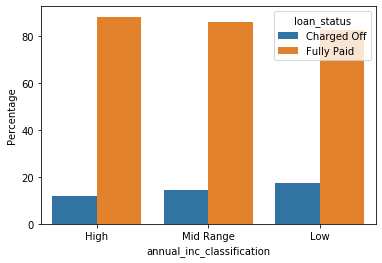

In [30]:
freq_rnkcnt_annual=(loans[(loans['loan_status']!="Current")].groupby(['annual_inc_classification','loan_status']).loan_status.count()/loans[(loans['loan_status']!="Current")].groupby(['annual_inc_classification']).loan_status.count())*100
freq_rnkcnt_annual=pd.DataFrame(freq_rnkcnt_annual)
freq_rnkcnt_annual.rename(columns={"loan_status":"Percentage"},inplace=True)
freq_rnkcnt_annual=pd.DataFrame(freq_rnkcnt_annual.to_records())
freq_rnkcnt_annual.sort_values(by="Percentage",inplace=True)

sns.barplot(x="annual_inc_classification",y="Percentage",data=freq_rnkcnt_annual,hue="loan_status")

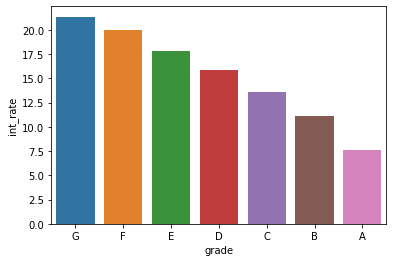

In [31]:
freq_rnkcnt_int=loans[(loans['loan_status']=="Charged Off")].groupby(['grade']).int_rate.mean()
freq_rnkcnt_int=pd.DataFrame(freq_rnkcnt_int)
freq_rnkcnt_int=pd.DataFrame(freq_rnkcnt_int.to_records())
freq_rnkcnt_int.sort_values(by="int_rate",inplace=True,ascending=False)
sns.barplot(x="grade",y="int_rate",data=freq_rnkcnt_int)